In [19]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
def plotClass(X,y,p):
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)

(2, 200)
(1, 200)


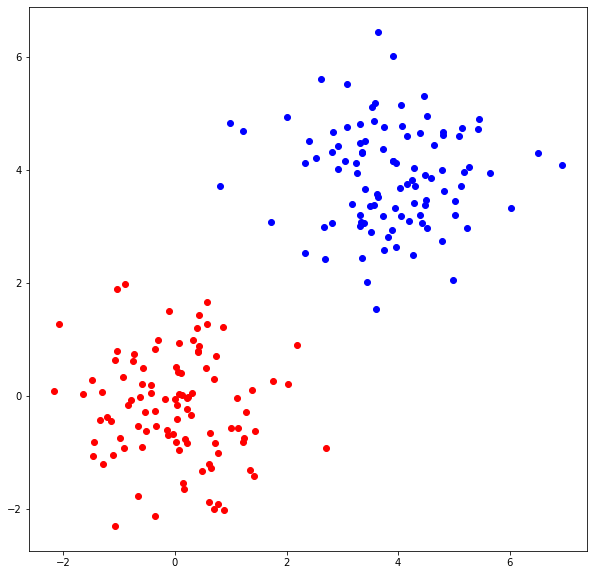

In [32]:
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+4
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

X=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

In [33]:
class LogisticRegressionWithSimpleGradientDecent:
    def __init__(self,features,targets,lr = 1e-4,cycles = 10000): # features is the X here, targets the y
        self._features = features
        self._targets = targets
        self.lr = lr
        self._cycles = cycles
        self._weights = np.random.randn(y.shape[0],X.shape[0])
        self._intercept = 0
        self._yhat = None


    def training(self):
        lossl = []

        for i in range(self._cycles):

            # Forward Pass

            z = self.linear(self._weights,self._features,self._intercept)
            yhat = self.sigmoid(z)

            
            losses = self.loss(self._targets,yhat)

            lossl.append(losses)


            # Derivatives and Backward Pass


            djdz = yhat - self._targets
            djdw = djdz @ self._features.T


            ones = np.ones(self._features.shape[1])
            ones = ones.reshape(-1,1)

            djdb = djdz @ ones 

            self._weights -= self.lr*djdw
            self._intercept -= self.lr*djdb

       
        return lossl


        

            
    def yhat(self):
        z = self.linear(self._weights,self._features,self._intercept)
        self._yhat = self.sigmoid(z)

        return self.sigmoid(z)



    def shape_confirm(self):
        print("features")
        print(self._features.shape)

        print("targets")
        print(self._targets.shape)

        print('weights')
        print(self._weights.shape)



    def graphics(self):

        yhat = self.yhat()
        
        plt.figure()
        plt.subplot(121)
        plotClass(X,y,'o')
        plt.subplot(122)
        plotClass(X, yhat > 0.5,'x') 
        x1 = np.reshape(np.linspace(-2,7,2),(-1,1)) # This I need to understand better.
        x2 = (- self._intercept - (self._weights[0,0]*x1))/self._weights[0,1]
        plt.plot(x1,x2)

        plt.figure()
        plt.plot(self.training())
  



    @staticmethod
    def sigmoid(z):
        return 1/(1 + np.exp(-z))
    
    @staticmethod
    def linear(weights,features,intercept):
        return weights@features + intercept

    @staticmethod
    def loss(y,yhat):
        return np.sum(-y * np.log(yhat)-(1-y)*np.log(1-yhat),axis =1)


    @staticmethod
    def plotClass(X,y,p):
        for i in range(y.shape[1]):
            if y[0,i]==0:
                plt.plot(X[0,i],X[1,i],'r'+p)
            else:
                plt.plot(X[0,i],X[1,i],'b'+p)


In [38]:
Model = LogisticRegressionWithSimpleGradientDecent(features=X,targets=y,cycles=100000)

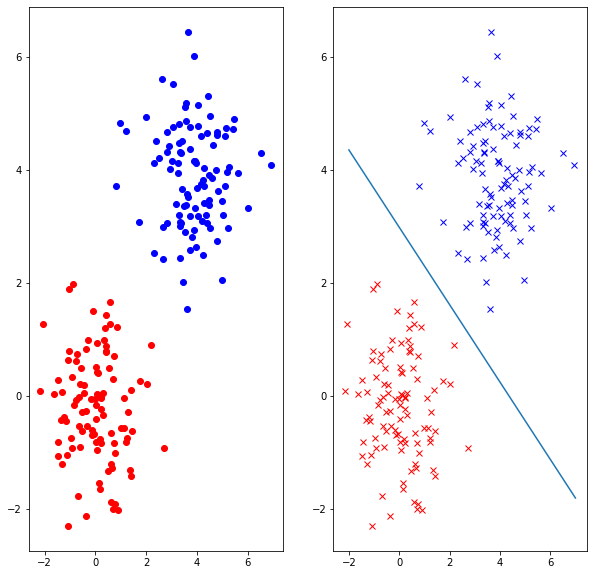

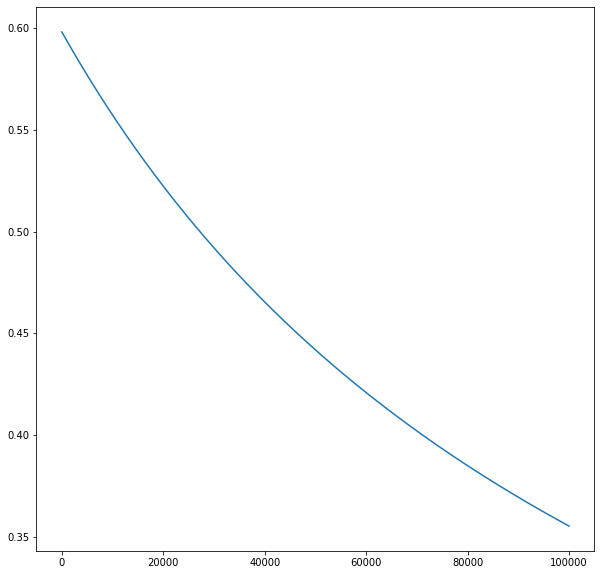

In [39]:
plt.rcParams['figure.figsize'] = [10, 10]

GD_output = Model.training()
Model.graphics()



